My intention of creating this blog is to showcase some analysis bits and pieces I play around with in a human readable friendly way. I have been coding in python for a while and recently started to use Jupyter notebooks as a neat way to explain findings.

When I then came across Jekyll and GitHub pages, I thought this is going to be great. An out the box solution to serve my Jupyter notebooks (and other miscellaneous ramblings) in a coherent, bloggy type way. Well, not quite... !

## The Problem
My assumption was that because Jekyll supports Markdown, and Jupyter notebooks can easily be converted to markdown this would all be a doddle. However, it turns out that the Jekyll flavoured Markdown is not always quite compatible with the markdown you can get from Jupyter. Oh, and also there is an element of path problems for resources.

> GitHub pages / Jekyll supports [kramdown](https://github.com/blog/2100-github-pages-now-faster-and-simpler-with-jekyll-3-0). 

After searching about online I found far fewer solutions to this issue than I thought there would be. And solutions that worked for the now deprecated iPython format didnt quite work for Jupyter notebooks although it did give me some good ideas.

## The Solution
The first guide I found that worked easily was this one from [Brian Caffey](http://briancaffey.github.io/2016/03/14/ipynb-with-jekyll.html), this is a good simple approach but a little bit manual. Ideally I want something that requires zero intervention from saving a .ipynb to producing a post.

I then found this [GitHub project](https://github.com/Nicolaidavies/NoHassle-jekyll) which I decided to [fork](https://github.com/adamdicken123/NoHassle-jekyll).

The result is a plugin which does the following:

+ Finds notebook files (.ipynb)
+ Runs nbconvert on them to generate markdown & names the file with Jekyll datetime name conventions
+ Handles copying of resources and updating paths
+ Optionally can add the frontmatter to the markdown

## Usage


### 0. Setup directory structure
You will need a directory to store you notebook files in which Jekyll can ignore. Create a folder called `_notebooks` in the root of your Jekyll project.

### 1. Add Jekyll plugin
Now this will not run on GitHub pages, but we don't need it to!

Simply add `noHassle.rb` to your `_plugins` directory.

Now run `jekyll serve` - this will now start monitoring all `.ipynb` notebooks in the `_notebooks` directory. Open up your jekyll site in a new tab for monitoring.

### 2. Create your .ipynb notebook
Create a new notebook in your `_notebooks` directory

Run `jupyter notebook` from within `_notebooks` and create a new notebook.

*__NOTE__: You may also wish to put notebooks within seperate directories for example the notebook for this post is under `_notebooks/Jupyter-Meets-Jekyll/`.*

When you create your notebook you will notice the jekyll command window print out info - this is the plugin talking.

At this point the plugin will have generated markdown for you new notebook and put it in `_posts`. But it won't be on the site yet because it has no front matter, so lets add this now.

### 3. Add YAML front matter
In the very first cell in your notebook add a `Raw NBConvert` cell. This will be what Jekyll uses to interpret the post, e.g.

```
---
layout: post
title: Jupyter meets Jekyll
---
```

Save the notebook, this will prompt jekyll to rebuild and hence the plugin to regen the markdown. Once complete the notebook will now be visible on your site.

> This step can also be done by the script by setting `@@add_frontmatter = true` in the options section of `noHassle.rb` - although I prefer having more explicit control over the post title (I might not want it to be the same as the file name). 

### 4. Do your thing
Now do your thing in your Jupyter notebook and include any and all markdown you wish to include in your blog post - e.g. see the [notebook source for this post](). 

> Currently I use the Jupyter servlet in my browser for editing notebooks - I use PyCharm as my IDE of choice but I find it doesn't play that nice with notebooks. Comment below if you have any good suggestions / thoughts on notebooks and IDE's.

For the sake of this tutorial here is a nice simple bit of python to generate a chart:

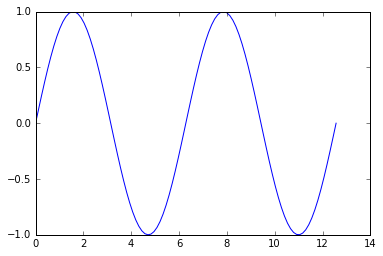

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 4*np.pi, 100)
y = np.sin(x)

plt.plot(x, y)

Enter the same in your notebook and hit save to trigger the plugin to refresh the markdown.

Hey presto, the chart is linked correctly ! If you check you will now have a `notebooks_resources` directory, all files generated by nbconvert are put here

### 6. Upload
I am using GitHub pages which won't support this plugin. But as long as I preview any changes to my site locally then the plugin will run there to put the necassary files into `_posts` and `notebook_resources` which will then be picked up by GitHub pages.

## Wrap up
If you think this is a neat idea follow through with this tutorial and check out [my fork of NoHassle-Jekyll](https://github.com/adamdicken123/NoHassle-jekyll)

I am also using Bokeh a bit in python, so in my next post I will be looking at how to integrate the Bokeh javascript into this workflow.